In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
# Load your cleaned data (before PCA)
df = pd.read_csv("../data/cleaned_cleveland.csv")  # Update if different filename

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]


C:\Users\rhmar\AppData\Local\Temp\ipykernel_23340\446643868.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


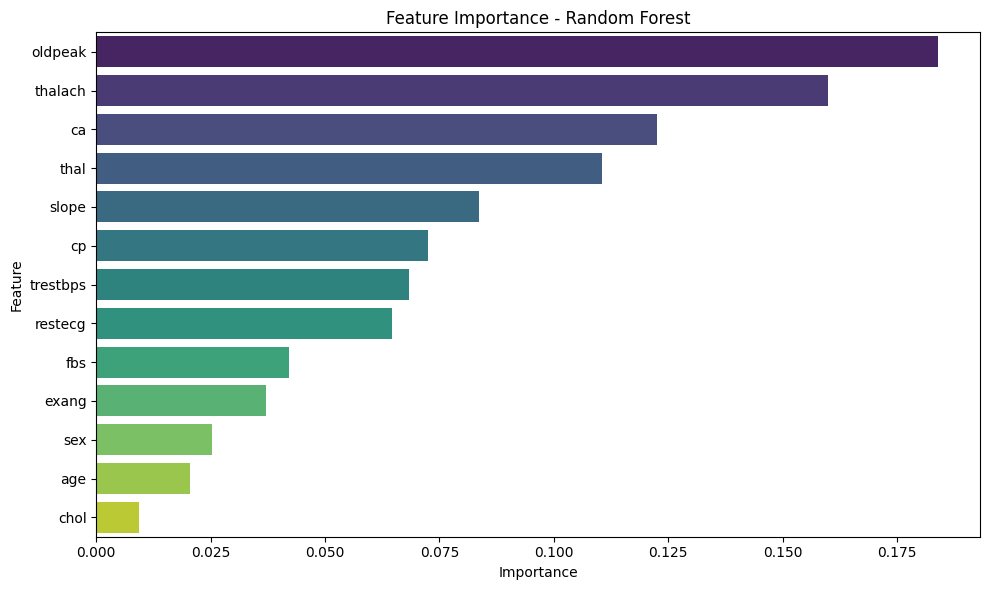

In [4]:
# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [5]:
# RFE with Logistic Regression or Random Forest
from sklearn.linear_model import LogisticRegression

rfe_estimator = LogisticRegression(max_iter=1000, solver='liblinear')
rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=8)
rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()
rfe_features = X.columns[rfe_support].tolist()
print("Selected features by RFE:", rfe_features)


Selected features by RFE: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal']


In [6]:
# Scale to [0,1] for chi2
X_scaled = MinMaxScaler().fit_transform(X)

# Apply chi2 test
chi2_selector = SelectKBest(score_func=chi2, k=8)
chi2_selector.fit(X_scaled, y)

chi2_support = chi2_selector.get_support()
chi2_features = X.columns[chi2_support].tolist()
print("Selected features by Chi-Square:", chi2_features)


Selected features by Chi-Square: ['age', 'cp', 'trestbps', 'restecg', 'thalach', 'oldpeak', 'slope', 'thal']


In [8]:
# Combine selected features (you can take intersection or union)
final_features = list(set(rfe_features + chi2_features + feat_imp_df.head(8)['Feature'].tolist()))
print("Final selected features:", final_features)

# Create reduced dataset
X_selected = X[final_features]
X_selected["target"] = y

# Save reduced dataset
X_selected.to_csv("../data/cleveland_selected_features.csv", index=False)


Final selected features: ['oldpeak', 'trestbps', 'age', 'fbs', 'slope', 'ca', 'sex', 'cp', 'exang', 'thalach', 'thal', 'restecg']
